In [1]:
#!pip install nltk
#!pip install autocorrect 
#!pip install wordcloud

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
import pandas as pd
from autocorrect import Speller
spell=Speller()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm 
import re


In [22]:
data=pd.read_csv("spam.csv",)
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [23]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [24]:
data.rename(columns={'v1':'labels','v2':'messages'},inplace=True)
data

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# visualization

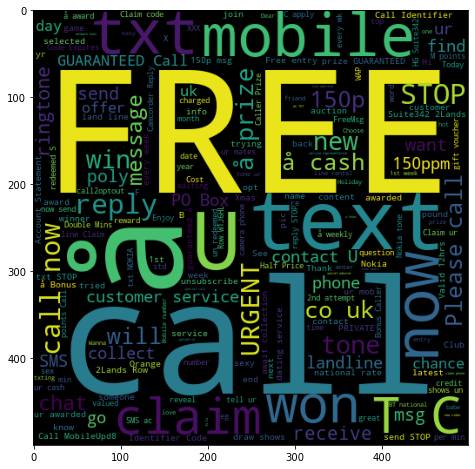

In [25]:
#fpr spam words
spam_words= ' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

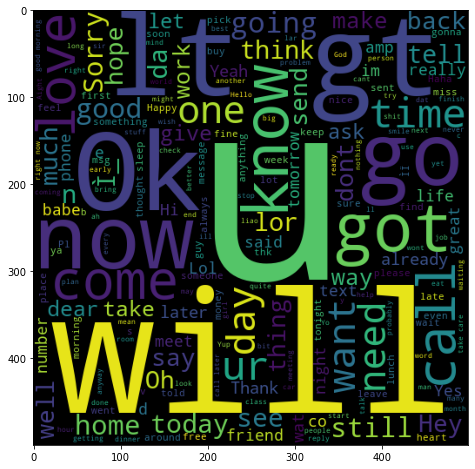

In [26]:
#For ham words
spam_words= ' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Preprocesssing NLP data 
- lowering the format 
- Tokenization
- remove stop words
- steaming/lemitization
- spell correction
- removing non alphabetic characters

In [27]:
#encoding data 
data['labels']=data['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saket\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.tokenize import PunktSentenceTokenizer

In [11]:
newdata=[]
processed_lines=[]
#tk = SyllableTokenizer()
for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    lines=re.sub('[^A-Za-z]',' ',lines) #removes non alphabetic characters
    lines=lines.lower() #converting all alphabets in lower case
    tokenize_lines=word_tokenize(lines) #tokenization

    for j in tokenize_lines:
        if j not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(j))) #removing stop words,stemming & spell correction
    final_lines=' '.join(processed_lines) 
    newdata.append(final_lines)                     


            
    

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [02:55<00:00, 31.68it/s]


# splitting data 


In [15]:
Y=data['labels']

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(newdata,Y,test_size=0.25)

# Vectorizing

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer()

In [18]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [20]:
X_train_vect

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 3, 2, ..., 1, 1, 0],
       [0, 3, 1, ..., 1, 0, 0],
       ...,
       [0, 3, 1, ..., 1, 0, 0],
       [0, 3, 2, ..., 1, 1, 0],
       [0, 3, 1, ..., 1, 1, 0]], dtype=int64)

# Train the Model using Naive Bayes 
In applications like spam filtering and sentiment analysis, the data majorly consists of the textual data in the form of reviews or the contents of an email. 

Naive Bayesian algorithm is a simple classification algorithm which uses probability of the events for its purpose. It is based on the Bayes Theorem which assumes that there is no interdependence amongst the variables. For example, if a fruit is banana and it has to be yellow/green in colour, in the shape of a banana and 1-2cm in radius. All of the properties stated above contribute individually towards that fruit being a banana and hence these features are referred to as “Naive”. As it considered the feature set to be Naive, the Naive Bayesian algorithm can be trained using less training data and also mislabeled data.

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [22]:
model.fit(X_train_vect,Y_train )

GaussianNB()

In [29]:
Y_pred=model.predict(X_test_vect)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
Y_test 

2628    0
2506    0
3029    0
169     0
239     0
       ..
431     0
3107    0
1288    0
2507    0
4490    0
Name: labels, Length: 1393, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [30]:
accuracy_score(Y_test,Y_pred)

1.0